# Configuring pandas

In [60]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 7)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Google Finance

In [61]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'yahoo', start, end) #'google'

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [102]:
# request the three years of data for MSFT
start = datetime(2020, 1, 1)
end = datetime(2021, 2, 17)
get_stock_data("TSM", start, end)[:5]

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,TSM,60.119999,59.599998,59.599998,60.040001,8432600.0,58.484398
2020-01-03,TSM,58.980000,58.040001,58.970001,58.060001,10546400.0,56.555698
2020-01-06,TSM,57.689999,57.130001,57.599998,57.389999,8897200.0,55.903057
2020-01-07,TSM,58.599998,56.740002,57.450001,58.320000,7444300.0,56.808964
2020-01-08,TSM,58.980000,58.110001,58.189999,58.750000,5381500.0,57.227818


In [63]:
# request the three years of data for MSFT
start = datetime(2020, 1, 1)
end = datetime(2021, 2, 17)
get_stock_data("MSFT", start, end)[:5]

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,MSFT,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936279
2020-01-03,MSFT,159.949997,158.059998,158.320007,158.619995,21116200.0,156.957260
2020-01-06,MSFT,159.100006,156.509995,157.080002,159.029999,20813700.0,157.362961
2020-01-07,MSFT,159.669998,157.320007,159.320007,157.580002,21634100.0,155.928177
2020-01-08,MSFT,160.800003,157.949997,158.929993,160.089996,27746500.0,158.411835


In [64]:
get_stock_data("MSFT", start, end)

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,MSFT,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936279
2020-01-03,MSFT,159.949997,158.059998,158.320007,158.619995,21116200.0,156.957260
2020-01-06,MSFT,159.100006,156.509995,157.080002,159.029999,20813700.0,157.362961
2020-01-07,MSFT,159.669998,157.320007,159.320007,157.580002,21634100.0,155.928177
2020-01-08,MSFT,160.800003,157.949997,158.929993,160.089996,27746500.0,158.411835
...,...,...,...,...,...,...,...
2021-02-10,MSFT,245.919998,240.889999,245.000000,242.820007,22186700.0,242.820007
2021-02-11,MSFT,245.149994,242.149994,244.779999,244.490005,15742200.0,244.490005
2021-02-12,MSFT,245.300003,242.729996,243.929993,244.990005,16552000.0,244.990005


In [65]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [66]:
# get the data for all the stocks that we want
#hold_list=["XLF", "XLV", "XLK", "SPLV"]
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [67]:
type(raw)

dict

In [68]:
#etf_list[0]

In [69]:
#raw[etf_list[0]][:5]

In [70]:
# take a peek at the data for MSFT
raw['MSFT'][:5]  #raw['XLF'][:5]

,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2020-01-02,MSFT,160.729996,158.330002,158.779999,160.619995,22622100.0,158.936279
2020-01-03,MSFT,159.949997,158.059998,158.320007,158.619995,21116200.0,156.957260
2020-01-06,MSFT,159.100006,156.509995,157.080002,159.029999,20813700.0,157.362961
2020-01-07,MSFT,159.669998,157.320007,159.320007,157.580002,21634100.0,155.928177
2020-01-08,MSFT,160.800003,157.949997,158.929993,160.089996,27746500.0,158.411835


In [71]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [72]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-02,21.420000,75.087502,59.040001,11.93,135.419998,54.990002,160.619995,135.820007,89.739998
2020-01-03,21.500000,74.357498,58.060001,11.97,134.339996,54.689999,158.619995,135.630005,87.900002
2020-01-06,21.000000,74.949997,57.660000,12.14,134.100006,54.669998,159.029999,136.149994,87.699997
2020-01-07,21.320000,74.597504,57.610001,12.05,134.190002,54.250000,157.580002,134.009995,86.769997
2020-01-08,20.459999,75.797501,58.849998,11.94,135.309998,54.349998,160.089996,134.699997,87.300003


In [73]:
print(close_px.iloc[1:5,1:5])

Ticker           AAPL        DAL     GE         IBM
Date                                               
2020-01-03  74.357498  58.060001  11.97  134.339996
2020-01-06  74.949997  57.660000  12.14  134.100006
2020-01-07  74.597504  57.610001  12.05  134.190002
2020-01-08  75.797501  58.849998  11.94  135.309998


# Plotting time-series prices

In [74]:
close_px.columns

Index(['AA', 'AAPL', 'DAL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP', 'UAL'], dtype='object', name='Ticker')

In [75]:
close_px.columns[0]

'AA'

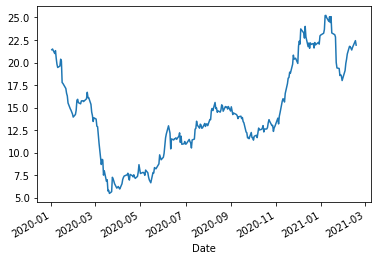

In [76]:
# plot the closing prices of AAPL
close_px[close_px.columns[0]].plot();

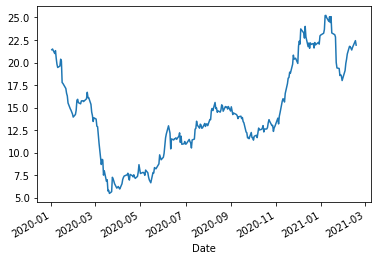

In [77]:
# plot the closing prices of MSFT
close_px[close_px.columns[0]].plot();

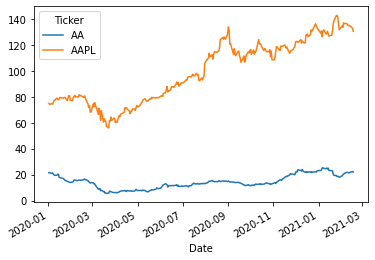

In [78]:
# plot MSFT vs AAPL on the same chart
close_px[[close_px.columns[0],close_px.columns[1]]].plot();

# Plotting volume series data

In [79]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2021-02-10,5196600.0,73046600.0,12011100.0,45559900.0,4866800.0,22965400.0,22186700.0,6966600.0,9772500.0
2021-02-11,3863100.0,64154400.0,8537500.0,51742800.0,5380600.0,21925300.0,15742200.0,7519100.0,8465500.0
2021-02-12,3304600.0,60029300.0,11472800.0,58371600.0,3868900.0,13131000.0,16552000.0,5657500.0,8973700.0
2021-02-16,4256300.0,80206200.0,13746500.0,60260400.0,6638000.0,15089500.0,26708200.0,5178800.0,13923000.0
2021-02-17,4204040.0,95934652.0,10876997.0,42615677.0,3975906.0,12705463.0,21673109.0,3320400.0,12569832.0


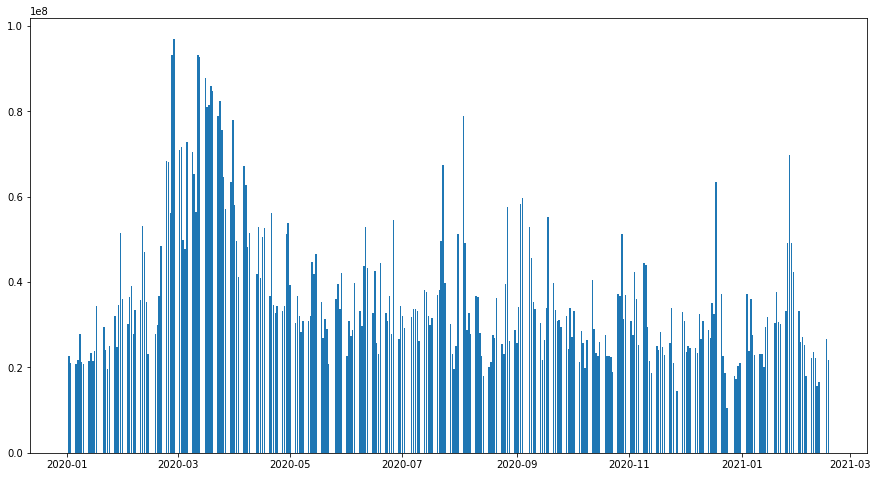

In [80]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

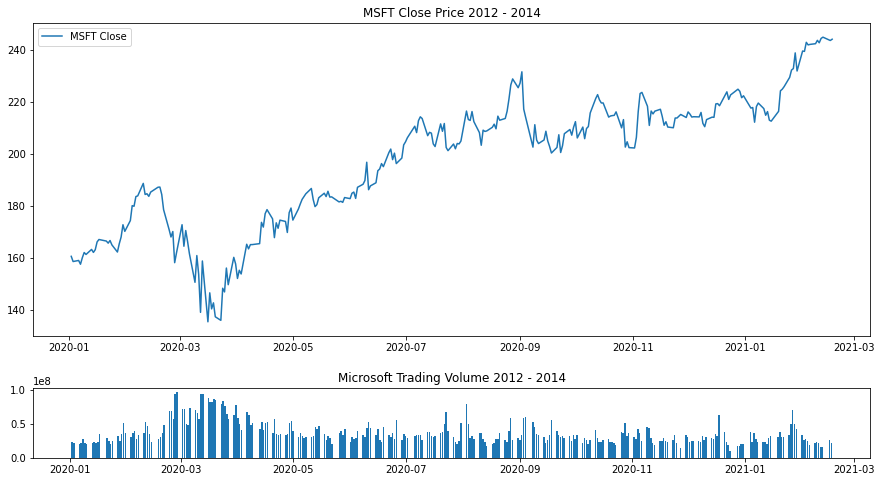

In [81]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [82]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.003735,-0.009722,-0.016599,0.003353,-0.007975,-0.005456,-0.012452,-0.001399,-0.020504
2020-01-06,-0.023256,0.007968,-0.006889,0.014202,-0.001786,-0.000366,0.002585,0.003834,-0.002275
2020-01-07,0.015238,-0.004703,-0.000867,-0.007414,0.000671,-0.007682,-0.009118,-0.015718,-0.010604
2020-01-08,-0.040338,0.016086,0.021524,-0.009129,0.008346,0.001843,0.015928,0.005149,0.006108


In [83]:
# check the percentage on 2012-01-05
close_px.loc['2020-01-03']['AAPL'] / \
    close_px.loc['2020-01-02']['AAPL'] -1

-0.00972203551987938

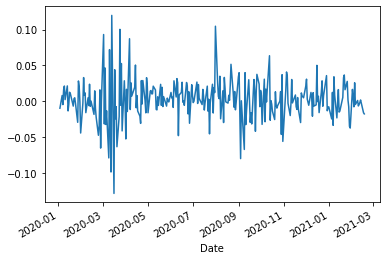

In [84]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

# Calculating simple daily cumulative returns

In [85]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.003735,0.990278,0.983401,1.003353,0.992025,0.994544,0.987548,0.998601,0.979496
2020-01-06,0.980392,0.998169,0.976626,1.017603,0.990253,0.994181,0.990101,1.002430,0.977268
2020-01-07,0.995331,0.993474,0.975779,1.010059,0.990917,0.986543,0.981073,0.986673,0.966904
2020-01-08,0.955182,1.009456,0.996782,1.000838,0.999188,0.988361,0.996700,0.991754,0.972810


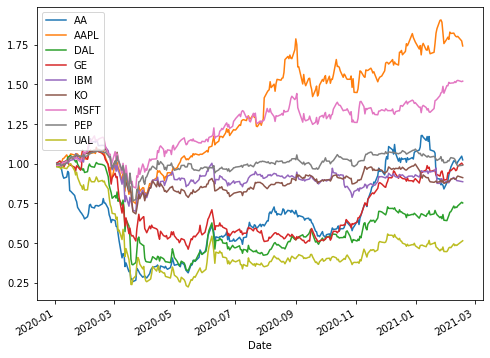

In [86]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [87]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-31,13.95,77.377502,55.740002,12.45,143.729996,58.400002,170.229996,142.020004,74.800003
2020-02-29,13.95,77.377502,55.740002,12.45,143.729996,58.400002,170.229996,142.020004,74.800003
2020-03-31,6.16,63.572498,28.530001,7.94,110.930000,44.250000,157.710007,120.099998,31.549999
2020-04-30,8.15,73.449997,25.910000,6.80,125.559998,45.889999,179.210007,132.289993,29.580000
2020-05-31,8.15,73.449997,25.910000,6.80,125.559998,45.889999,179.210007,132.289993,29.580000


In [88]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-31,-0.558423,-0.178411,-0.488159,-0.362249,-0.228206,-0.242295,-0.073547,-0.154344,-0.578209
2020-04-30,0.323052,0.155374,-0.091833,-0.143577,0.131885,0.037062,0.136326,0.101499,-0.062441
2020-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-31,0.441577,0.821589,0.511841,0.637751,0.771794,0.757705,0.926453,0.845656,0.421791
2020-04-30,0.584229,0.949242,0.464837,0.546185,0.873582,0.785788,1.052752,0.931488,0.395455
2020-05-31,0.584229,0.949242,0.464837,0.546185,0.873582,0.785788,1.052752,0.931488,0.395455


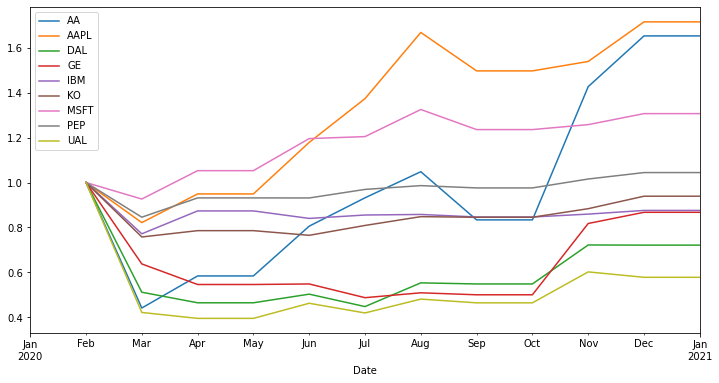

In [90]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Analyzing distribution of returns

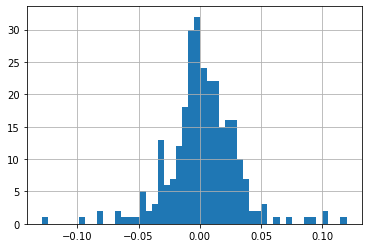

In [91]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

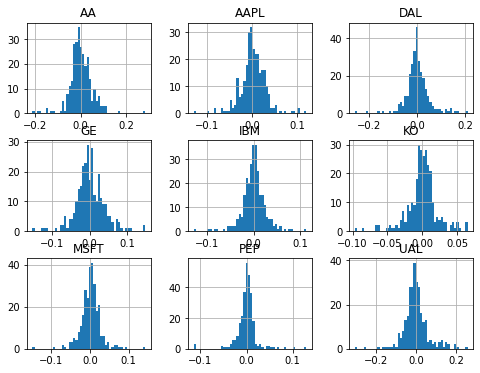

In [92]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

# Performing moving average calculation

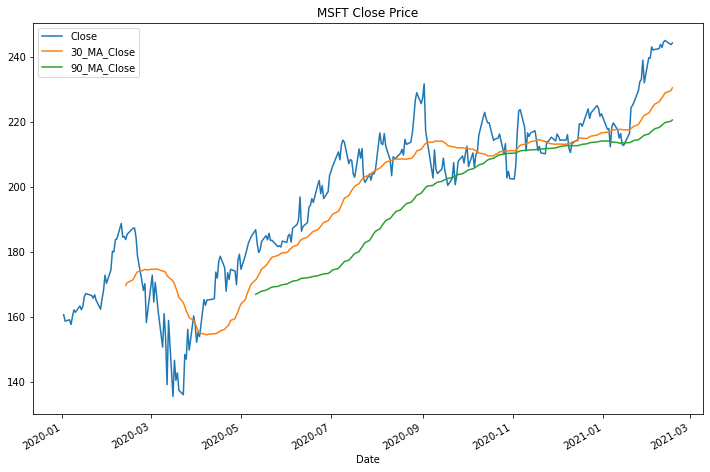

In [93]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparision of average daily returns across stocks

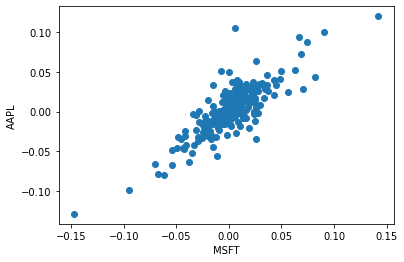

In [94]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

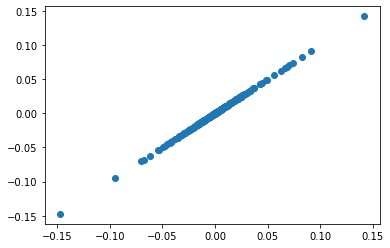

In [95]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

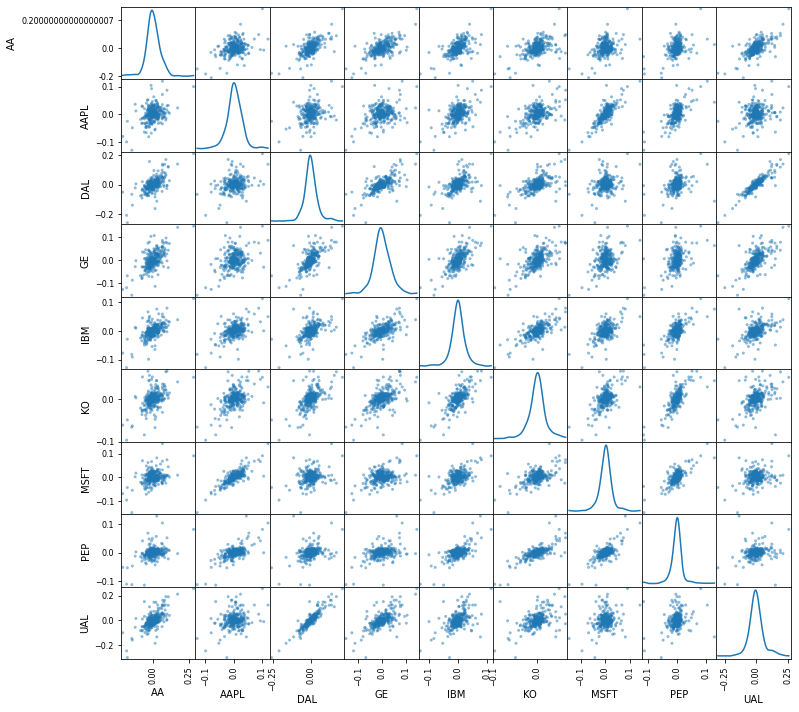

In [96]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation of stocks based upon daily percentage change of closing price

In [97]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Ticker,,,,,,,,,
AA,1.000000,0.390312,0.654866,0.638514,0.599760,0.504828,0.395239,0.427137,0.685848
AAPL,0.390312,1.000000,0.316386,0.394224,0.541542,0.545754,0.825907,0.669823,0.288314
DAL,0.654866,0.316386,1.000000,0.679199,0.553355,0.584095,0.305686,0.347149,0.926014
GE,0.638514,0.394224,0.679199,1.000000,0.646100,0.609442,0.428535,0.450895,0.667670
IBM,0.599760,0.541542,0.553355,0.646100,1.000000,0.714844,0.603495,0.683226,0.511747
KO,0.504828,0.545754,0.584095,0.609442,0.714844,1.000000,0.576602,0.756625,0.491606
MSFT,0.395239,0.825907,0.305686,0.428535,0.603495,0.576602,1.000000,0.736939,0.281134
PEP,0.427137,0.669823,0.347149,0.450895,0.683226,0.756625,0.736939,1.000000,0.265454
UAL,0.685848,0.288314,0.926014,0.667670,0.511747,0.491606,0.281134,0.265454,1.000000


In [98]:
print(corrs.iloc[2,:])

Ticker
AA      0.654866
AAPL    0.316386
DAL     1.000000
GE      0.679199
IBM     0.553355
KO      0.584095
MSFT    0.305686
PEP     0.347149
UAL     0.926014
Name: DAL, dtype: float64


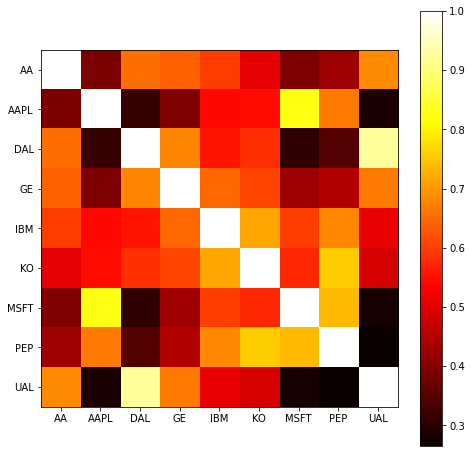

In [99]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

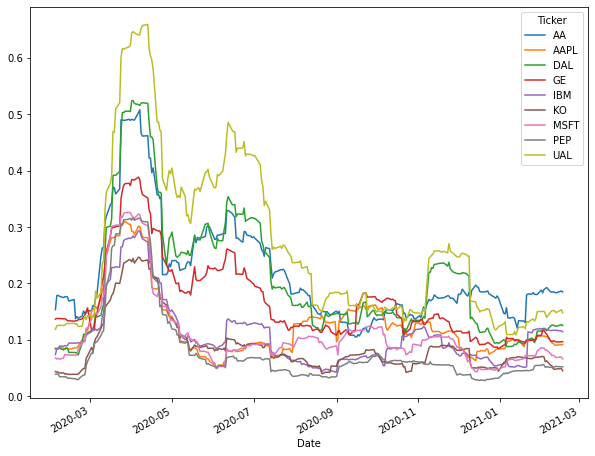

In [100]:
# 75 period minimum
min_periods = 22 #75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

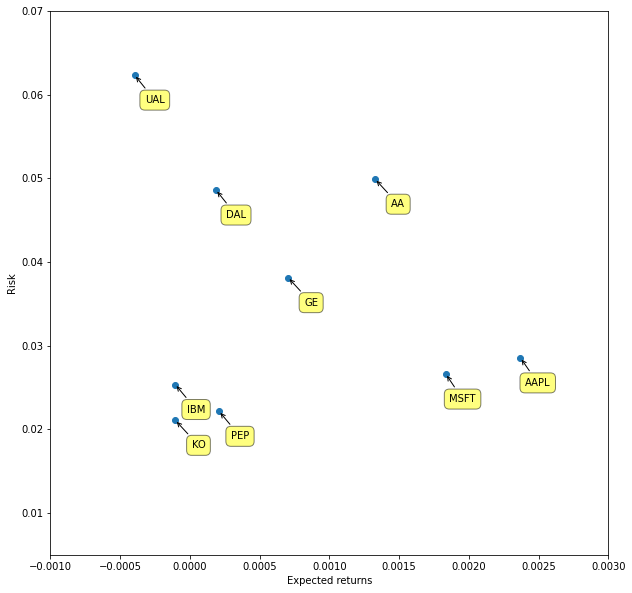

In [101]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))
# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.07)
# set size
plt.gcf().set_size_inches(10,10) #(8,8)